All require libraries imported

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import os

C:\Users\Suraj\AppData\Local\Temp\ipykernel_16756\1844088545.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
current_directory = os.getcwd()
data_dir = os.path.join(current_directory,"Datasets","Energy_consumption.csv")
data = pd.read_csv(data_dir)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          1000 non-null   object 
 1   Temperature        1000 non-null   float64
 2   Humidity           1000 non-null   float64
 3   SquareFootage      1000 non-null   float64
 4   Occupancy          1000 non-null   int64  
 5   HVACUsage          1000 non-null   object 
 6   LightingUsage      1000 non-null   object 
 7   RenewableEnergy    1000 non-null   float64
 8   DayOfWeek          1000 non-null   object 
 9   Holiday            1000 non-null   object 
 10  EnergyConsumption  1000 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 86.1+ KB


In [4]:
data.head()

,Timestamp,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
0,2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
1,2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2,2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
3,2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
4,2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [5]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

data.set_index("Timestamp",inplace=True)

In [6]:
data.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday,EnergyConsumption
Timestamp,,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No,75.364373
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No,83.401855
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No,78.270888
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No,56.519850
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No,70.811732


In [28]:
x1 = data.iloc[:,:9]

In [29]:
x1.head()

,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,DayOfWeek,Holiday
Timestamp,,,,,,,,,
2022-01-01 00:00:00,25.139433,43.431581,1565.693999,5,On,Off,2.774699,Monday,No
2022-01-01 01:00:00,27.731651,54.225919,1411.064918,1,On,On,21.831384,Saturday,No
2022-01-01 02:00:00,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,Sunday,No
2022-01-01 03:00:00,20.080469,50.371637,1452.316318,1,Off,On,8.623447,Wednesday,No
2022-01-01 04:00:00,23.097359,51.401421,1094.130359,9,On,Off,3.071969,Friday,No


In [7]:
sns.set_theme()


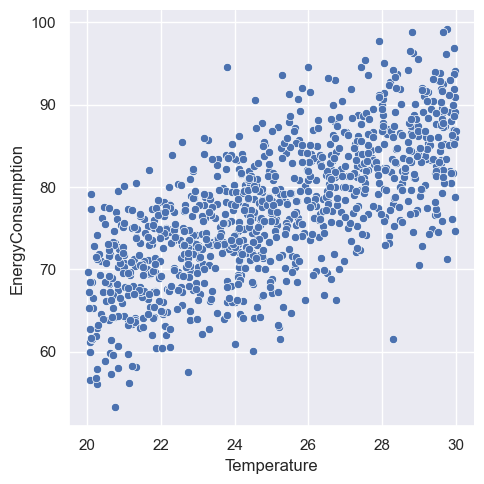

In [8]:
sns.relplot(data=data,x=data["Temperature"],y=data["EnergyConsumption"])

In [9]:
x = data["Temperature"]
y = data["EnergyConsumption"]

In [10]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=42)
x_train = x_train1.values.reshape(-1,1)
y_train = y_train1.values.reshape(-1,1)
x_test = x_test1.values.reshape(-1,1)
y_test = y_test1.values.reshape(-1,1)


In [11]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print("Coefficients of regression : ",regr.coef_)
print("mean_squared_error : %.2f"% mean_squared_error(y_test, y_pred))
print("Coefficients of determination :%.2f "% r2_score(y_test, y_pred))

Coefficients of regression :  [[2.00595699]]
mean_squared_error : 35.81
Coefficients of determination :0.45 


In [12]:
z = {"Temperature": x_train1, "EnergyConsumpition": y_train1, "x_test": x_test1, "y_test":y_test1}
z= pd.DataFrame(z)

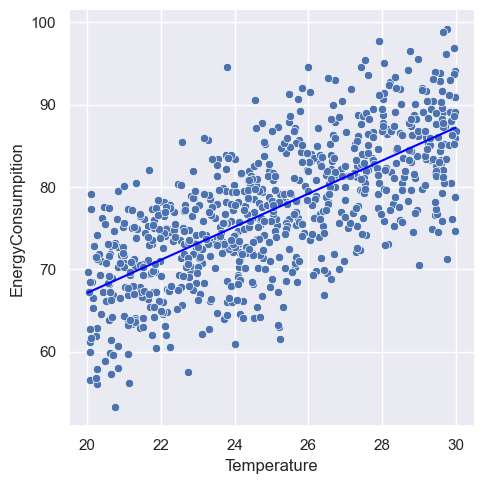

In [13]:
m = regr.coef_.reshape(-1)
b = regr.intercept_.reshape(-1)
sns.relplot(data=z,x="Temperature",y="EnergyConsumpition")
x_val = np.linspace(z["Temperature"].min(),z["Temperature"].max(),100)
y_val = m*x_val + b
plt.plot(x_val,y_val,color = "blue")

Overall, an R^2 value of 0.45 suggests that the regression model has moderate predictive power, explaining a significant portion but not all of the variance in the dependent variable. However, a mean squared error of 35.81 indicates that there is still room for improvement in reducing prediction errors. So, while the model is performing decently, there is still scope for enhancement.

So now we will use another algorithm
based on type of data and their relationship we can use different algorithms such as :
1. Multiple linear regression
2. Decision Tree Regressor
3. Random Forest
4. Gradient Boosting Regressor
5. Support Vector regressor
6. Neural Network

but from data we can see more categorical data is available so i think that decision tree and random forest can be greate algorithm which is suitable for this type of data

In [16]:
from sklearn.ensemble import HistGradientBoostingRegressor
estimate = HistGradientBoostingRegressor().fit(x_train, y_train)

d:\Applications\Python\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
estimate.score(x_train, y_train)

0.590734810275148